**2.1 Building the circuit to prepare the Bell state**

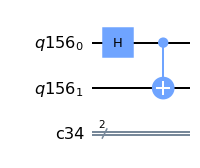

In [54]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

# Applying Hadamard to first qubit
qc.h(q[0])
# Applying CNOT gate where first qubit is control bit, and second qubit is target bit
qc.cx(q[0], q[1])

qc.draw(output='mpl')

In [55]:
# Verifying that bell state has been obtained
qc.measure(q,[1,0])
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'00': 520, '11': 480}


**2.2  Adding Error Gate with probability 'p'**

In [56]:
from random import randrange
# function to introduce error with a probability p
def chance(prob):
    '''
    params:
        prob(float): value of probability
        
    returns:
        cause(bool): 1 or 0
    '''
    limiting_number = int(100 * prob )
    random_number = randrange(100)
    return random_number < limiting_number
    

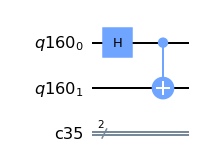

In [57]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])

# Applying error gate to individual bits
# here for each bit
# - probability of  X-gate acting on it is 0.2 = (0.4 * 0.5)
# - probability of Z-gate acting on it is 0.2 = (0.4 * 0.5)
for i in [0,1]:
    if chance(0.4):
        if randrange(2) == 0:
            qc.x(q[i])
            print('X Error gate acts on {} qubit'.format(i))
        else:
            qc.z(q[i])
            print('Z Error gate acts on {} qubit'.format(i))



qc.cx(q[0], q[1])

qc.draw(output='mpl')

In [58]:
# Cases explained here - https://bit.ly/3pkAzce

job = execute(qc, Aer.get_backend('statevector_simulator'))
for v in job.result().get_statevector(experiment=qc, decimals=2):
    print(v)


qc.measure(q,[1,0])
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)
{'00': 502, '11': 498}


In [59]:
# Counting if we get answers as per theoretical calculation or not
n1 = 0 # Number of times we obtain |00> +/- |11>/root(2), theoretical expectations = 80 times out of 100
n2 = 0 # Number of times we obtain |01> +/- |10>/root(2), theoretical expectations = 20 times out of 100
for r in range(100):
    print('{} iteration'.format(r))
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    qc.h(q[0])
    for i in [0,1]:
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on {} qubit'.format(i))
            else:
                qc.z(q[i])
                print('Z Error gate acts on {} qubit'.format(i))
    qc.cx(q[0], q[1])
    
    qc.measure(q,[1,0])
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    print(counts.get('00') )
    if counts.get('00') != None:
        n1 += 1
    else:
        n2 += 1


print('Number of times |00> +/- |11>/root(2) ', n1)
print('Number of times |01> +/- |10>/root(2) ', n2)
# We see the around 20 % of the times we get |01> +/- |10>/root(2), which is caused by error gates. Now this error correction needs to be done. Also we need to keep
# in mind that there there was also a change in output in case of |00> - |11>/ root(2), but  measurements using expectation values cannot differentiate it.

0 iteration
Z Error gate acts on 0 qubit
Z Error gate acts on 1 qubit
507
1 iteration
Z Error gate acts on 1 qubit
477
2 iteration
Z Error gate acts on 0 qubit
495
3 iteration
Z Error gate acts on 0 qubit
X Error gate acts on 1 qubit
None
4 iteration
Z Error gate acts on 1 qubit
533
5 iteration
516
6 iteration
Z Error gate acts on 0 qubit
X Error gate acts on 1 qubit
None
7 iteration
X Error gate acts on 0 qubit
503
8 iteration
Z Error gate acts on 1 qubit
484
9 iteration
488
10 iteration
Z Error gate acts on 0 qubit
Z Error gate acts on 1 qubit
487
11 iteration
Z Error gate acts on 0 qubit
507
12 iteration
Z Error gate acts on 0 qubit
501
13 iteration
Z Error gate acts on 0 qubit
483
14 iteration
Z Error gate acts on 0 qubit
505
15 iteration
509
16 iteration
Z Error gate acts on 0 qubit
484
17 iteration
510
18 iteration
Z Error gate acts on 0 qubit
Z Error gate acts on 1 qubit
528
19 iteration
494
20 iteration
485
21 iteration
Z Error gate acts on 0 qubit
493
22 iteration
Z Error gate

In [60]:
# Here in this cell, it is shown through state vectors are indeed changed when error gates act
for r in range(10):
    print('{} iteration'.format(r))
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)
    qc.h(q[0])
    for i in [0,1]:
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on {} qubit'.format(i))
            else:
                qc.z(q[i])
                print('Z Error gate acts on {} qubit'.format(i))
    qc.cx(q[0], q[1])
    
    job = execute(qc, Aer.get_backend('statevector_simulator'))
    for v in job.result().get_statevector(experiment=qc, decimals=3):
        print('Coffecients are ',v )
    qc.measure(q,[1,0])
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    
    
    print(counts )
    print()

0 iteration
Coffecients are  (0.7071067811865476+0j)
Coffecients are  0j
Coffecients are  0j
Coffecients are  (0.7071067811865475+0j)
{'00': 516, '11': 484}

1 iteration
Coffecients are  (0.7071067811865476+0j)
Coffecients are  0j
Coffecients are  0j
Coffecients are  (0.7071067811865475+0j)
{'00': 511, '11': 489}

2 iteration
Z Error gate acts on 0 qubit
Coffecients are  (0.7071067811865476+0j)
Coffecients are  (-0+0j)
Coffecients are  0j
Coffecients are  (-0.7071067811865475+0j)
{'00': 495, '11': 505}

3 iteration
Coffecients are  (0.7071067811865476+0j)
Coffecients are  0j
Coffecients are  0j
Coffecients are  (0.7071067811865475+0j)
{'00': 476, '11': 524}

4 iteration
X Error gate acts on 0 qubit
Coffecients are  (0.7071067811865475+0j)
Coffecients are  0j
Coffecients are  0j
Coffecients are  (0.7071067811865476+0j)
{'00': 471, '11': 529}

5 iteration
Coffecients are  (0.7071067811865476+0j)
Coffecients are  0j
Coffecients are  0j
Coffecients are  (0.7071067811865475+0j)
{'00': 500, 

**2.3 Encoding each with bit flip and fixing the error - Using Shor's Code**

Z Error gate acts on main qubit - 9


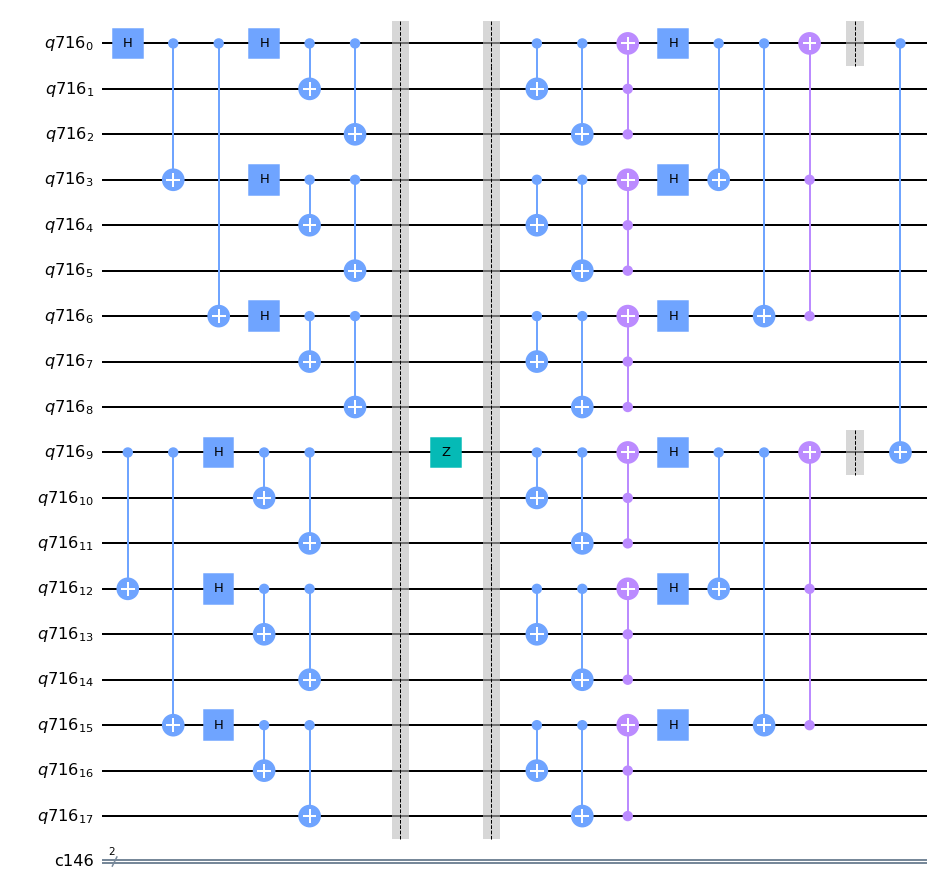

In [62]:
# For Shor's Code, we require 8 ancilliary Qubits for each main Qubit,
# Hence here we require a total of  18 Qubits, where qubits with indices 0,9 are the main Qubits and the rest are ancilliary Qubits

q= QuantumRegister(18)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])

# Encoding as per Shor's Algorithm
main_qubits = [0,9]
for i in main_qubits:
    qc.cx(q[i], q[i+3])
    qc.cx(q[i], q[i+6])
    
    qc.h(q[i])
    qc.h(q[i+3])
    qc.h(q[i+6])
    
    qc.cx(q[i], q[i+1])
    qc.cx(q[i+3], q[i+4])
    qc.cx(q[i+6], q[i+7])
    
    qc.cx(q[i], q[i+2])
    qc.cx(q[i+3], q[i+5])
    qc.cx(q[i+6], q[i+8])
  

qc.barrier()

# Let the error Gates act
for i in main_qubits:
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on main qubit - {}'.format(i))
                
            else:
                qc.z(q[i])
                print('Z Error gate acts on main qubit - {}'.format(i))
                
                
    
qc.barrier()

# Applying the error correction code
for i in main_qubits:
    qc.cx(q[i], q[i+1])
    qc.cx(q[i+3], q[i+4])
    qc.cx(q[i+6], q[i+7])
    
    qc.cx(q[i], q[i+2])
    qc.cx(q[i+3], q[i+5])
    qc.cx(q[i+6], q[i+8])
    
    qc.ccx(q[i+2], q[i+1], q[i])
    qc.ccx(q[i+5],q[i+4],q[i+3])
    qc.ccx(q[i+8],q[i+7],q[i+6])
    
    qc.h(q[i])
    qc.h(q[i+3])
    qc.h(q[i+6])
    
    qc.cx(q[i], q[i+3])
    qc.cx(q[i], q[i+6])
    
    qc.ccx(q[i+6], q[i+3], q[i])
    

qc.snapshot("main qubits", qubits=[0,9])
   
qc.cx(q[0], q[9])
qc.draw(output='mpl')

In [63]:
# Verifying by measuing
# The output has to be |00> + |11> / root(2) as the correction has been applied

qc.measure([0,9],[1,0])
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'00': 488, '11': 512}


In [64]:
# checking 100 times
# Each time should result in |00> + |11>/root(2)

n1 = 0 # Number of times we obtain |00> + |11>/root(2), should be 100 as error correction is applied
n2 = 0 # Number of times any other result is obtained, should be 0 

for r in range(100):
    print('iteration ',r)
    q= QuantumRegister(18)
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)

    qc.h(q[0])

    # Encoding as per Shor's Algorithm
    main_qubits = [0,9]
    for i in main_qubits:
        qc.cx(q[i], q[i+3])
        qc.cx(q[i], q[i+6])

        qc.h(q[i])
        qc.h(q[i+3])
        qc.h(q[i+6])

        qc.cx(q[i], q[i+1])
        qc.cx(q[i+3], q[i+4])
        qc.cx(q[i+6], q[i+7])

        qc.cx(q[i], q[i+2])
        qc.cx(q[i+3], q[i+5])
        qc.cx(q[i+6], q[i+8])

    # Let the error Gates act
    for i in main_qubits:
            if chance(0.4):
                if randrange(2) == 0:
                    qc.x(q[i])
                    print('X Error gate acts on main qubit - {}'.format(i))
                else:
                    qc.z(q[i])
                    print('Z Error gate acts on main qubit - {}'.format(i))

    # Applying the error correction code
    for i in main_qubits:
        qc.cx(q[i], q[i+1])
        qc.cx(q[i+3], q[i+4])
        qc.cx(q[i+6], q[i+7])

        qc.cx(q[i], q[i+2])
        qc.cx(q[i+3], q[i+5])
        qc.cx(q[i+6], q[i+8])

        qc.ccx(q[i+2], q[i+1], q[i])
        qc.ccx(q[i+5],q[i+4],q[i+3])
        qc.ccx(q[i+8],q[i+7],q[i+6])

        qc.h(q[i])
        qc.h(q[i+3])
        qc.h(q[i+6])

        qc.cx(q[i], q[i+3])
        qc.cx(q[i], q[i+6])

        qc.ccx(q[i+6], q[i+3], q[i])


    qc.cx(q[0], q[9])

    qc.measure([0,9],[1,0])
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    if counts.get('00') != None:
        n1 += 1
    else:
        n2 += 1

print('number of times we get |00> +/- |11>/root(2)', n1)
print('number of times we get |01> +/- |10>/root(2)', n2)

iteration  0
X Error gate acts on main qubit - 0
iteration  1
Z Error gate acts on main qubit - 0
iteration  2
Z Error gate acts on main qubit - 0
iteration  3
iteration  4
iteration  5
Z Error gate acts on main qubit - 9
iteration  6
Z Error gate acts on main qubit - 0
iteration  7
iteration  8
iteration  9
iteration  10
X Error gate acts on main qubit - 0
iteration  11
Z Error gate acts on main qubit - 0
iteration  12
Z Error gate acts on main qubit - 9
iteration  13
X Error gate acts on main qubit - 0
Z Error gate acts on main qubit - 9
iteration  14
Z Error gate acts on main qubit - 0
iteration  15
Z Error gate acts on main qubit - 0
X Error gate acts on main qubit - 9
iteration  16
iteration  17
iteration  18
iteration  19
X Error gate acts on main qubit - 9
iteration  20
X Error gate acts on main qubit - 0
iteration  21
Z Error gate acts on main qubit - 0
X Error gate acts on main qubit - 9
iteration  22
X Error gate acts on main qubit - 9
iteration  23
iteration  24
X Error gate

In [65]:
# making shor's code with lesser number of Qubits in total - using the same anicillia bits for both the qubits

n1 = 0 # Number of times we obtain |00> + |11>/root(2), should be 100 as error correction is applied
n2 = 0 # Number of times any other result is obtained, should be 0 

for r in range(100):
    print('iteration ',r)
    q = QuantumRegister(10)
    # 0 and 1 are the main qubits
    # 2 -> 9 are the ancilliary qubits for both 0 and 1
    c = ClassicalRegister(2)
    qc = QuantumCircuit(q,c)

    qc.h(q[0])

    # Encoding as per Shor's Algorithm
    main_qubits = [0,1]
    for i in main_qubits:
        qc.cx(q[i], q[4])
        qc.cx(q[i], q[7])

        qc.h(q[0])
        qc.h(q[4])
        qc.h(q[7])

        qc.cx(q[i], q[2])
        qc.cx(q[4], q[5])
        qc.cx(q[7], q[8])

        qc.cx(q[i], q[3])
        qc.cx(q[4], q[6])
        qc.cx(q[7], q[9])

    # Let the error Gates act
        if chance(0.4):
            if randrange(2) == 0:
                qc.x(q[i])
                print('X Error gate acts on main qubit - {}'.format(i))
            else:
                qc.z(q[i])
                print('Z Error gate acts on main qubit - {}'.format(i))

    # Applying the error correction code
        qc.cx(q[i], q[2])
        qc.cx(q[4], q[5])
        qc.cx(q[7], q[8])

        qc.cx(q[i], q[3])
        qc.cx(q[4], q[6])
        qc.cx(q[7], q[9])

        qc.ccx(q[3], q[2], q[i])
        qc.ccx(q[6],q[5],q[3])
        qc.ccx(q[9],q[8],q[7])

        qc.h(q[i])
        qc.h(q[4])
        qc.h(q[7])

        qc.cx(q[i], q[4])
        qc.cx(q[i], q[7])

        qc.ccx(q[7], q[4], q[i])
        
        if i == 0:
            for p in range(2,10):
                qc.reset(q[p])


    qc.cx(q[0], q[1])
    qc.measure([0,9],[1,0])
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    if counts.get('00') != None:
        n1 += 1
    else:
        n2 += 1

print('number of times we get |00> +/- |11>/root(2)', n1)
print('number of times we get |01> +/- |10>/root(2)', n2)

iteration  0
iteration  1
X Error gate acts on main qubit - 0
iteration  2
X Error gate acts on main qubit - 0
X Error gate acts on main qubit - 1
iteration  3
X Error gate acts on main qubit - 1
iteration  4
X Error gate acts on main qubit - 0
iteration  5
Z Error gate acts on main qubit - 0
X Error gate acts on main qubit - 1
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
Z Error gate acts on main qubit - 0
iteration  12
iteration  13
X Error gate acts on main qubit - 1
iteration  14
iteration  15
X Error gate acts on main qubit - 0
iteration  16
iteration  17
Z Error gate acts on main qubit - 0
iteration  18
iteration  19
iteration  20
Z Error gate acts on main qubit - 0
Z Error gate acts on main qubit - 1
iteration  21
iteration  22
X Error gate acts on main qubit - 1
iteration  23
iteration  24
Z Error gate acts on main qubit - 1
iteration  25
iteration  26
X Error gate acts on main qubit - 0
iteration  27
X Error gate acts on main qubit - 1
iterat

In [66]:
# Steane's 7 bit code
q = QuantumRegister(14)
a = QuantumRegister(6)
c = ClassicalRegister(2)

qc = QuantumCircuit(q,a,c)


# 3 and 10 are our main qubits
qc.h(q[3])
main_qubits = [3,10]
    
for i in main_qubits:
    # encoding 
    qc.h(q[i-3])
    qc.h(q[i-2])
    qc.h(q[i-1])
    
    qc.barrier()

    qc.cx(q[i],q[i+1])
    qc.cx(q[i],q[i+2])
    
    qc.barrier()

    qc.cx(q[i-1],q[i])
    qc.cx(q[i-1],q[i+1])
    qc.cx(q[i-1],q[i+3])
    
    qc.barrier()

    qc.cx(q[i-2],q[i])
    qc.cx(q[i-2],q[i+2])
    qc.cx(q[i-2],q[i+3])
    
    qc.barrier()
    
    qc.cx(q[i-3],q[i+1])
    qc.cx(q[i-3],q[i+2])
    qc.cx(q[i-3],q[i+3])
    
    qc.barrier()


    # Let error gates act
    if chance(0.4):
        if randrange(2) == 0:
            qc.x(q[i])
            print('X Error gate acts on main qubit - {}'.format(i))
        else:
            qc.z(q[i])
            print('Z Error gate acts on main qubit - {}'.format(i))
    
    
    qc.barrier()
    
    # Decoding
    for p in range(0,6):
        qc.h(a[p])

    qc.cz(a[0], q[i+3])
    qc.cz(a[0], q[i+2])
    qc.cz(a[0], q[i+1])
    qc.cz(a[0], q[i-3])
    
    qc.barrier()
    
    qc.cz(a[1], q[i+3])
    qc.cz(a[1], q[i+2])
    qc.cz(a[1], q[i])
    qc.cz(a[1], q[i-2])
    
    qc.barrier()
    
    qc.cz(a[2], q[i+3])
    qc.cz(a[2], q[i+1])
    qc.cz(a[2], q[i])
    qc.cz(a[2], q[i-1])
    
    
    qc.cx(a[3], q[i+3])
    qc.cx(a[3], q[i+2])
    qc.cx(a[3], q[i+1])
    qc.cx(a[3], q[i-3])
    
    
    qc.cx(a[4], q[i+3])
    qc.cx(a[4], q[i+2])
    qc.cx(a[4], q[i])
    qc.cx(a[4], q[i-2])
    
    
    qc.cx(a[5], q[i+3])
    qc.cx(a[5], q[i+1])
    qc.cx(a[5], q[i])
    qc.cx(a[5], q[i-1])
    
    for p in range(0,6):
        qc.h(a[p])
    
    syndrome_bits = []
    print('Syndrome bits')
    for k in range(5,-1,-1):
        qc.measure(a[k], c[1])
        job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
        counts = job.result().get_counts(qc)
        syndrome_bits.append(list(counts.keys())[0][0])
    syndrome_bits = [ int(syn_bit) for syn_bit in syndrome_bits[::-1]]
    print(syndrome_bits)
    
    # Conditional Correction of Z-gate 
    if (not syndrome_bits[3]) and syndrome_bits[4] and syndrome_bits[5]:
        qc.z(q[i])
        print('Z-gate to be applied on {} qubit'.format(i))
        
    # Condition correction of X-gate
    if (not syndrome_bits[0]) and syndrome_bits[1] and syndrome_bits[2]:
        qc.x(q[i])
        print('X-gate need to be applied on {} qubit'.format(i))
    
    
    qc.measure(q[i],c[1])
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    
    qc.draw(output='mpl', filename='steane_code_for_bit_{}.png'.format(i))
    if i == 3:
        for index_a in range(6):
            qc.reset(a[index_a])

            
qc.cx(q[3], q[10])
qc.measure([3,10],c)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print('counts ', counts)

Z Error gate acts on main qubit - 3
Syndrome bits
[0, 0, 0, 0, 1, 1]
Z-gate to be applied on 3 qubit
Syndrome bits
[0, 0, 0, 0, 0, 0]
counts  {'00': 236, '01': 255, '10': 247, '11': 262}
